In [1]:
from dnn_app_utils_v3 import load_data, print_mislabeled_images
from deep_neural_network import neural_network
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [2]:
#Functions to be used later

def show_image(X, Y, index, classes):
    plt.imshow(X[index])
    print ("y = " + str(Y[0,index]) + ". It's a " + classes[Y[0,index]].decode("utf-8") +  " picture.")
    plt.show()
    
def flatten(dataset):
    dataset = dataset.reshape(dataset.shape[0],-1).T
    return dataset

def show_costs(costs, learning_rate):
    iterations = [i * 100 for i, each in enumerate(costs)]
    plt.plot(iterations,costs)
    plt.xlim(min(iterations),max(iterations))
    plt.xlabel('Iterations')
    plt.ylim(0,1)
    plt.ylabel('Cost')
    plt.title('Learning rate = {}'.format(learning_rate))
    plt.show()
    
def model(train_x, train_y, test_x, test_y, layer_dims, learning_rate, num_iterations, use_previous):
    np.random.seed(1)
    nn = neural_network(layer_dims, use_previous)
    print(nn)

    costs = nn.train(train_x, train_y, learning_rate = learning_rate, num_iterations = num_iterations, print_costs=True)

    show_costs(costs, learning_rate=learning_rate)

    train_predict = nn.predict(train_x)
    test_predict = nn.predict(test_x)

    neural_network.print_accuracy(train_predict,train_y,"Train")
    neural_network.print_accuracy(test_predict,test_y,'Test')
    
    return nn

y = 0. It's a non-cat picture.


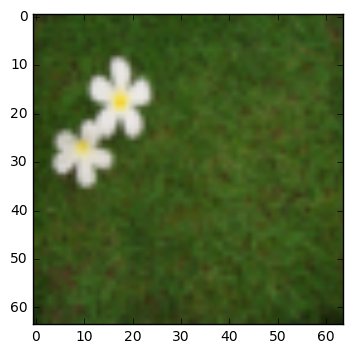

In [3]:
show_image(train_x_orig,train_y,6,classes)

In [4]:
train_x = flatten(train_x_orig)/255
test_x = flatten(test_x_orig)/255

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


Layer: 1
	W.shape = (7, 12288)
	b.shape = (7, 1)
	activation function = relu

Layer: 2
	W.shape = (1, 7)
	b.shape = (1, 1)
	activation function = sigmoid


Cost after 0 iterations: 0.693049735659989
Cost after 100 iterations: 0.6464320953428849
Cost after 200 iterations: 0.6325140647912677
Cost after 300 iterations: 0.6015024920354665
Cost after 400 iterations: 0.5601966311605747
Cost after 500 iterations: 0.5158304772764729
Cost after 600 iterations: 0.47549013139433255
Cost after 700 iterations: 0.4339163151225749
Cost after 800 iterations: 0.4007977536203886
Cost after 900 iterations: 0.3580705011323798
Cost after 1000 iterations: 0.3394281538366413
Cost after 1100 iterations: 0.3052753636196265
Cost after 1200 iterations: 0.27491377282130147
Cost after 1300 iterations: 0.24681768210614824
Cost after 1400 iterations: 0.1985073503746611
Cost after 1500 iterations: 0.17448318112556593
Cost after 1600 iterations: 0.1708076297809661
Cost after 1700 iterations: 0.11306524562164737
Cost a

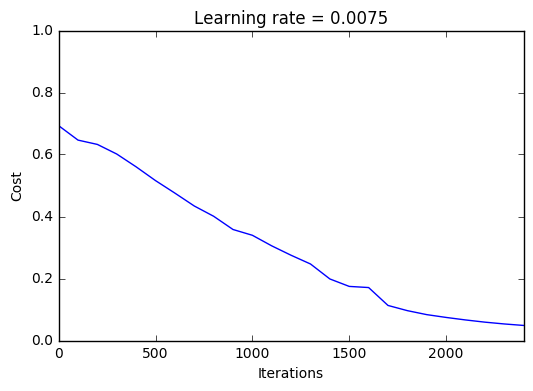

Train accuracy: 100.00%
Test accuracy: 72.00%


In [5]:
layers_dims = [12288,7,1]
two_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, use_previous=False)

Layer: 1
	W.shape = (20, 12288)
	b.shape = (20, 1)
	activation function = relu

Layer: 2
	W.shape = (7, 20)
	b.shape = (7, 1)
	activation function = relu

Layer: 3
	W.shape = (5, 7)
	b.shape = (5, 1)
	activation function = relu

Layer: 4
	W.shape = (1, 5)
	b.shape = (1, 1)
	activation function = sigmoid


Cost after 0 iterations: 0.7717493284237686
Cost after 100 iterations: 0.6720534400822913
Cost after 200 iterations: 0.6482632048575212
Cost after 300 iterations: 0.6115068816101354
Cost after 400 iterations: 0.567047326836611
Cost after 500 iterations: 0.5401376634547801
Cost after 600 iterations: 0.5279299569455267
Cost after 700 iterations: 0.46547737717668514
Cost after 800 iterations: 0.369125852495928
Cost after 900 iterations: 0.39174697434805344
Cost after 1000 iterations: 0.31518698886006163
Cost after 1100 iterations: 0.2726998441789385
Cost after 1200 iterations: 0.23741853400268131
Cost after 1300 iterations: 0.19960120532208644
Cost after 1400 iterations: 0.18926300388463

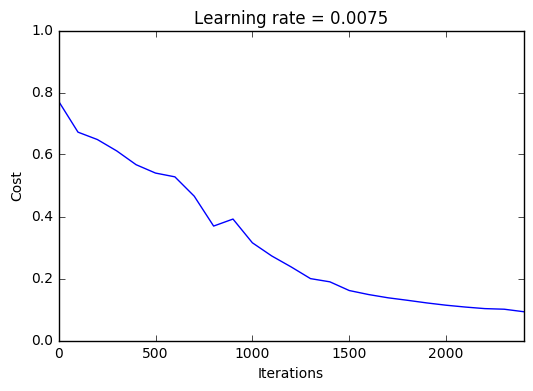

Train accuracy: 98.56%
Test accuracy: 80.00%


In [6]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
four_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, use_previous=True)

Layer: 1
	W.shape = (7, 12288)
	b.shape = (7, 1)
	activation function = relu

Layer: 2
	W.shape = (1, 7)
	b.shape = (1, 1)
	activation function = sigmoid


Cost after 0 iterations: 0.6950464961800915
Cost after 100 iterations: 0.5892596054583805
Cost after 200 iterations: 0.5232609173622991
Cost after 300 iterations: 0.4497686396221907
Cost after 400 iterations: 0.42090021618838985
Cost after 500 iterations: 0.3724640306174595
Cost after 600 iterations: 0.347420518702019
Cost after 700 iterations: 0.31719191987370293
Cost after 800 iterations: 0.2664377434774658
Cost after 900 iterations: 0.21991432807842567
Cost after 1000 iterations: 0.14357898893623783
Cost after 1100 iterations: 0.45309212623220957
Cost after 1200 iterations: 0.09499357670093513
Cost after 1300 iterations: 0.08014128076781371
Cost after 1400 iterations: 0.06940234005536462
Cost after 1500 iterations: 0.060216640231745916
Cost after 1600 iterations: 0.053274157580018786
Cost after 1700 iterations: 0.0476290326209843

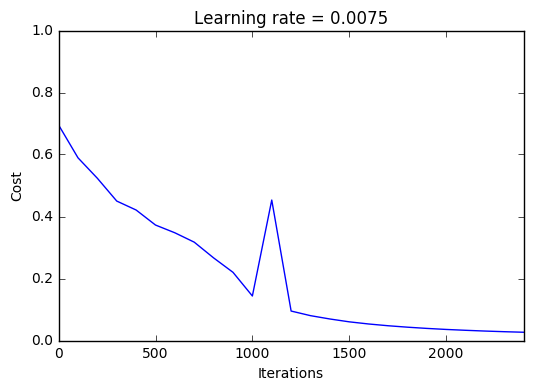

Train accuracy: 100.00%
Test accuracy: 74.00%


In [7]:
layers_dims = [12288,7,1]

#performance of two layer network with use_previous=True (same as four layer network)
two_layer_nn = model(train_x, train_y, test_x, test_y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, use_previous=True)